In [1]:
import os
import numpy as np
import pandas as pd
import imagesize
import matplotlib.pyplot as plt

In [2]:
class_names = {
    0:'Person',
    1:'Car',
    2:'Truck',
    3:'UAV',
    4:'Aircraft',
    5:'Ship'
}

In [3]:
def inspect_dataset(
        target_dataset_root,  # ../datasets/new_dataset
        target_dataset_slice,  # train,test,val
):
 info = []  # list of lists, each list corresponds to an instance [cls_id, x, y, w, h, img]

 target_labels_dir = os.path.join(target_dataset_root, 'labels', target_dataset_slice)

 # Iterate over all files in the original dataset labels folder
 for filename in os.listdir(target_labels_dir):
  if filename.endswith('.txt'):
   # Read file
   with open(os.path.join(target_labels_dir, filename), "r") as f:
    # Iterate over instances in image and get present class ids
    for line in f:
     line_data = []
     # label data
     line_data = line.split()
     # Image name
     line_data.append(os.path.splitext(filename)[0])
     # Image size: could be done at image level and not row level
     img_path = os.path.join(target_dataset_root, 'images', target_dataset_slice,
                             os.path.splitext(filename)[0] + '.jpg')
     img_w, img_h = imagesize.get(img_path)
     line_data.extend([img_w, img_h])
     # Append line data to info
     info.append(line_data)

 df = pd.DataFrame(info, columns=['new_class_id', 'xcn', 'ycn', 'wn', 'hn', 'img', 'img_w', 'img_h'])
 df = df.astype(
  {'new_class_id': 'int32', 'xcn': 'float32', 'ycn': 'float32', 'wn': 'float32', 'hn': 'float32', 'img': 'int64',
   'img_w': 'float32', 'img_h': 'float32'})
 df['class_name'] = df['new_class_id'].map(class_names)
 return df

In [4]:
# Create dir to store plots
dataset = 'Tiny'
save_dir = './data/dataset_creation/plots/'+ dataset
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [5]:
df = inspect_dataset('/Users/inaki-eab/Desktop/DETECTOR_DATASETS/custom_tiny', 'train')

In [6]:
df

,new_class_id,xcn,ycn,wn,hn,img,img_w,img_h,class_name
0,0,0.229919,0.927484,0.005672,0.012376,53656,1920.0,1080.0,Person
1,0,0.136968,0.581839,0.003102,0.009974,53656,1920.0,1080.0,Person
2,5,0.345732,0.630245,0.016463,0.016046,53656,1920.0,1080.0,Ship
3,5,0.380375,0.265343,0.010750,0.010315,53656,1920.0,1080.0,Ship
4,0,0.044204,0.942000,0.004032,0.016463,54139,1920.0,1072.0,Person
...,...,...,...,...,...,...,...,...,...
34183,1,0.830495,0.177014,0.027656,0.018843,54120,1920.0,1080.0,Car
34184,1,0.922583,0.182880,0.027458,0.021315,54120,1920.0,1080.0,Car
34185,1,0.954716,0.186065,0.032349,0.020278,54120,1920.0,1080.0,Car
34186,1,0.038846,0.037921,0.016234,0.020287,54120,1920.0,1080.0,Car


In [7]:
print(f"The number of objects is {len(df)}")
print(f"The number of images is {len(df['img'].unique())}")

The number of objects is 34188
The number of images is 711


In [8]:
# CATEGORIZE OBJECT SIZE
df['bbox_area'] = (df['wn']*df['img_w'])*(df['hn']*df['img_h'])
bin_edges = [0, 16**2, 32**2, 96**2, float('inf')]
bin_labels = ['Tiny', 'Small', 'Medium', 'Large']
df['bbox_size_category'] = pd.cut(df['bbox_area'], bins=bin_edges, labels=bin_labels, right=False)

In [9]:
df

,new_class_id,xcn,ycn,wn,hn,img,img_w,img_h,class_name,bbox_area,bbox_size_category
0,0,0.229919,0.927484,0.005672,0.012376,53656,1920.0,1080.0,Person,145.555557,Tiny
1,0,0.136968,0.581839,0.003102,0.009974,53656,1920.0,1080.0,Person,64.157936,Tiny
2,5,0.345732,0.630245,0.016463,0.016046,53656,1920.0,1080.0,Ship,547.799988,Small
3,5,0.380375,0.265343,0.010750,0.010315,53656,1920.0,1080.0,Ship,229.929291,Tiny
4,0,0.044204,0.942000,0.004032,0.016463,54139,1920.0,1072.0,Person,136.630875,Tiny
...,...,...,...,...,...,...,...,...,...,...,...
34183,1,0.830495,0.177014,0.027656,0.018843,54120,1920.0,1080.0,Car,1080.587402,Medium
34184,1,0.922583,0.182880,0.027458,0.021315,54120,1920.0,1080.0,Car,1213.612061,Medium
34185,1,0.954716,0.186065,0.032349,0.020278,54120,1920.0,1080.0,Car,1360.212402,Medium
34186,1,0.038846,0.037921,0.016234,0.020287,54120,1920.0,1080.0,Car,682.934509,Small


In [10]:
df['bbox_size_category'].value_counts()

bbox_size_category
Tiny      21787
Small      7678
Medium     4322
Large       401
Name: count, dtype: int64

In [11]:
# PERFORM PLOTS
plt.rcParams.update({'font.size': 10})

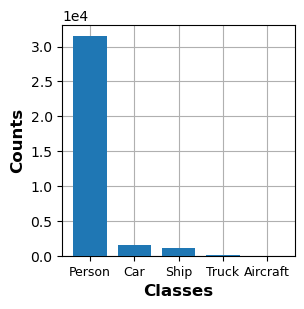

In [12]:
fig = plt.figure(figsize=(3, 3))
ax = df['class_name'].value_counts().plot(kind='bar', width=0.75, zorder=3, label='Training')
# Set x-axis label
ax.set_xlabel("Classes", weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("Counts", weight='bold', size=12)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=9)
ax.grid()
#plt.legend()
None
fig.savefig(save_dir + '/train_class_counts.png', bbox_inches = 'tight')

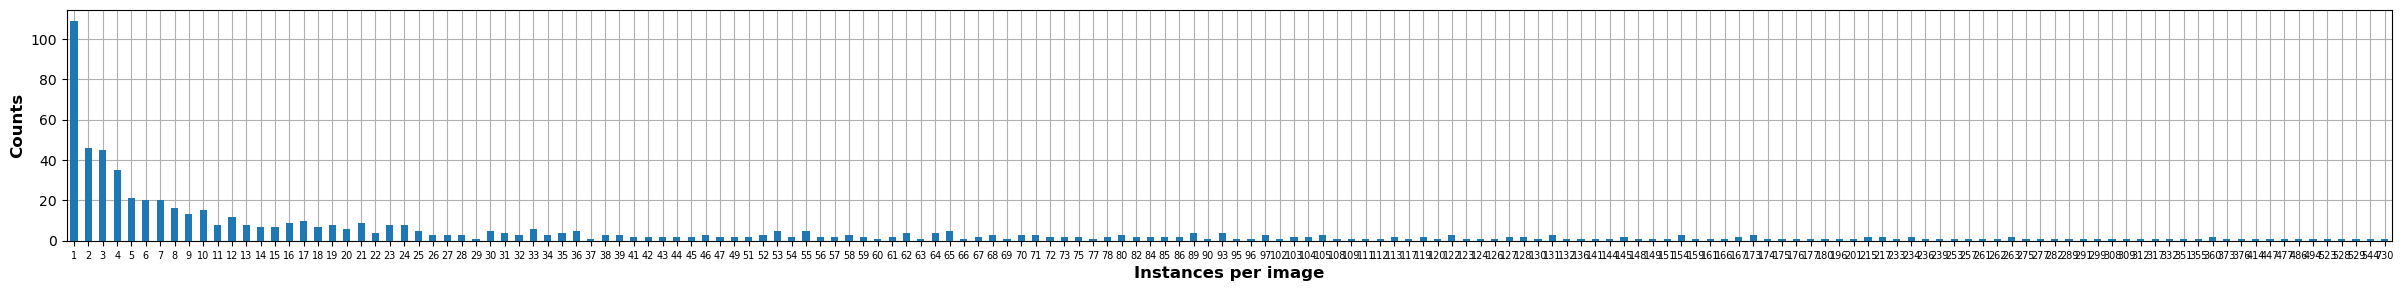

In [13]:
fig = plt.figure(figsize=(30, 3))
ax = df.groupby(by=['img'])['img'].count().value_counts().sort_index().plot(kind='bar', zorder=3, label='Training')
# Set x-axis label
ax.set_xlabel("Instances per image", weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("Counts", weight='bold', size=12)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=7)
ax.grid()

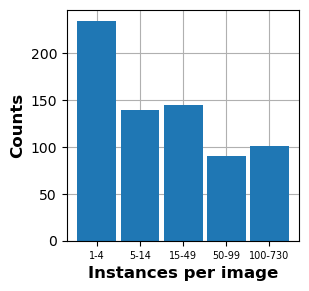

In [15]:
#bins = [1,4,7,10,16,28] #TJU
#bins = [1,4,7,10,16,47] #DUT
#bins = [1,4,7,10,16,68] #Client
#bins = [1,4,7,10,16,31,221] #RTTS

data = df['img'].value_counts()
bins = [1,5,15,50,100,data.max()+1]

hist, bin_edges = np.histogram(data,bins) # make the histogram

fig,ax = plt.subplots(figsize=(3, 3))

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=0.9) 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i,j in enumerate(hist)])
# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{}-{}'.format(bins[i],bins[i+1]-1) for i,j in enumerate(hist)], size=7)

ax.set_xlabel("Instances per image", weight='bold', size=12)
ax.set_ylabel("Counts", weight='bold', size=12)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
plt.rcParams['axes.axisbelow'] = True
ax.grid()
None
fig.savefig(save_dir + '/train_instances_counts.png', bbox_inches = 'tight')

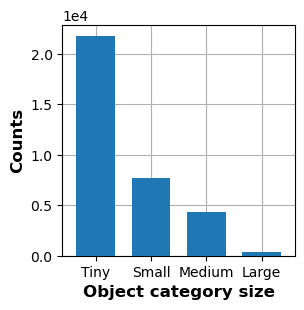

In [16]:
fig = plt.figure(figsize=(3, 3))
ax = df['bbox_size_category'].value_counts().sort_index().plot(kind='bar', width=0.7, zorder=3, label='Training')
# Set x-axis label
ax.set_xlabel("Object category size", weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("Counts", weight='bold', size=12)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid()
None
fig.savefig(save_dir+'/train_objsz_counts.png', bbox_inches = 'tight')